In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from functools import reduce

def idxtomat(filename,ints='>IIII'):
    binfile = open(filename , 'rb')
    buf = binfile.read()
    magic, *dims = struct.unpack_from(ints , buf )
    
    index=struct.calcsize(ints)
    BS=reduce(lambda x,y:x*y,dims)

    ims = struct.unpack_from('>%sB' %BS ,buf, index)
    print(index,dims,BS)
    ims = np.array(ims)
    ims = ims.reshape(tuple(dims))
    return ims

def NNclassifier(imgs):
    pass  #reutrn labels

def showimg(mat):
    plt.imshow(mat , cmap='gray')
    plt.show()

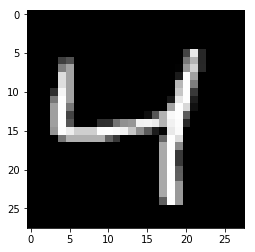

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,) 4
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   

In [8]:
# showimg(tr_imgs[101])

showimg(tr_imgs[2])
print(tr_imgs.shape,tr_labs.shape,t10_imgs.shape,t10_labs.shape,tr_labs[2])
print(tr_imgs[2])

In [3]:
filename = ['train-images.idx3-ubyte','train-labels.idx1-ubyte','t10k-images.idx3-ubyte','t10k-labels.idx1-ubyte']


tr_imgs=idxtomat('datasets/'+filename[0])
tr_labs=idxtomat('datasets/'+filename[1],'>II')
t10_imgs=idxtomat('datasets/'+filename[2])
t10_labs=idxtomat('datasets/'+filename[3],'>II')


judge_imgs=np.tile(0,(10,28,28))

for i in range(0,10):
    print(tr_labs[tr_labs==i].shape)
    judge_imgs[i]=tr_imgs[tr_labs==i].mean(0)

#showimg(judge_imgs[0])

16 [60000, 28, 28] 47040000
8 [60000] 60000
16 [10000, 28, 28] 7840000
8 [10000] 10000
(5923,)
(6742,)
(5958,)
(6131,)
(5842,)
(5421,)
(5918,)
(6265,)
(5851,)
(5949,)


In [21]:
labs_=np.tile(10,10000)
for x in range(10000):
    t10_img=t10_imgs[x]
    s=np.tile(0,10)
    
    #for i in range(10):
    #    dis=t10_img-judge_imgs[i]
     #   diss=dis**2
     #   s[i]=diss.sum()
        #s[i]=sdi**0.5
    s=((np.tile(t10_img,(60000,1,1))-tr_imgs)**2).sum((1,2))
    labs_[x]=tr_labs[list(s).index(s.min())]
    #print(s,s.min(),list(s).index(s.min()))
    #showimg(t10_img)

ones=np.tile(1,10000)
ones[labs_==t10_labs].sum()/ones.sum()

0.96909999999999996

array([4484089, 7500857, 4788240, 6696216, 5779313, 5641699, 3189610,
       7164997, 5962253, 6186258])

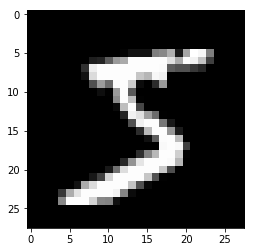

In [14]:
## test area

filename = ['train-images.idx3-ubyte','train-labels.idx1-ubyte']
binfile = open('../datasets/'+filename[0] , 'rb')
buf = binfile.read()
index = 0
magic, *numImages= struct.unpack_from('>I32B' , buf , index)
index += struct.calcsize('>IIII')

im = struct.unpack_from('>784B' ,buf, 16)
index += struct.calcsize('>784B')
ima = np.array(im)
imar = ima.reshape(28,28)
plt.imshow(imar , cmap='gray')
plt.show()

In [26]:
tr_imgs[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  